In [39]:
import numpy as np
import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

'''
Linear regression toy example
'''

def generate_dataset():
    # data is generated by y = 1.7x + e
    # where 'e' is sampled from a normal distribution
    x_batch = np.linspace(-1, 1, 101)
    print(np.random.randn(*x_batch.shape))
    y_batch = 1.7 * x_batch + np.random.randn(*x_batch.shape) * 0.3
    return x_batch, y_batch

def linear_regression():
    x = tf.placeholder(tf.float32, shape=(None,), name='x')
    y = tf.placeholder(tf.float32, shape=(None,), name='y')
    
    with tf.variable_scope('lreg') as scope:
        W = tf.Variable(np.random.normal(), name='W')
        y_pred = tf.multiply(W, x)
        
        # Mean Squared Error (loss)
        mse_loss = tf.reduce_mean(tf.square(y_pred - y))
        return x, y, y_pred, mse_loss

def run():
    x_batch, y_batch = generate_dataset()
    
    x, y, y_pred, mse_loss = linear_regression()
    optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(mse_loss)
    
    init = tf.global_variables_initializer()
    with tf.Session() as session:
        session.run(init)
        
        feed_dict = {x: x_batch, y: y_batch}
        for _ in range(30):
            loss_val, _ = session.run([mse_loss, optimizer], feed_dict)
            print('loss: ', loss_val.mean())
            
        y_pred_batch = session.run(y_pred, {x: x_batch})
    
    plt.figure(1)
    plt.scatter(x_batch, y_batch)
    plt.plot(x_batch, y_pred_batch)
    plt.show()

[  2.38227108e-01  -5.41923740e-01   9.63921156e-01   1.36619141e+00
   2.02035188e+00  -4.77554624e-01  -2.51684189e+00   7.75112160e-01
  -1.42638471e+00   2.02287979e+00   1.92545531e+00   5.58901784e-01
  -1.61804589e+00   2.80898285e-01  -3.79006034e-02   3.87530274e-01
   2.97500081e-01   5.67192412e-01  -5.70089088e-01  -1.37905619e+00
  -1.85270156e-01   1.11989030e+00   5.31700911e-02  -8.81653157e-01
  -1.10698403e+00  -7.42046946e-01   1.76814358e+00  -6.93404299e-01
   6.64768707e-01   4.77235925e-01   1.52296249e+00   5.01479022e-01
  -1.29189657e+00   9.68915931e-01  -1.03650686e+00  -2.18853452e+00
  -5.34525911e-01  -1.26788632e+00   3.16279745e-01  -8.07347958e-01
  -8.72889318e-01  -2.86160739e-01   2.86892274e-02   1.83830897e+00
  -6.35802842e-05  -6.21960612e-02   1.10333858e-02   1.11711620e-01
   1.33912801e+00  -1.01974116e+00  -4.62566032e-02  -2.70171114e-01
   1.47678472e+00  -2.29160951e+00  -9.55542747e-01   1.72773856e+00
   3.48193151e-01  -5.10232168e-03

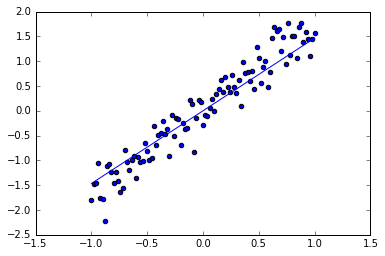

In [40]:
run()